1.Import necessary libraries

In [970]:

# Data cleaning and visualizing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Machine Learing (classification models) Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold


2.Data cleaning and exploring

In [971]:
#import CSV file and visualize it in dataframe
df=pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [972]:
def data_cleaning(df):
    '''
    This function is for data cleaning by dropping unnecessary columns, checking null values and duplicated values
    '''
    # Dropping columns with unusual names
    df=df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
    
    # Dropping column CLIENTNUM, Because it is identifier, not useful for the prediction
    df=df.drop( 'CLIENTNUM', axis=1)

    return  df
    
df=df

new_df=data_cleaning(df)

In [973]:
# Splitting columns into Categorical and Numerical Feature Lists 
categorical_features = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

numerical_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

In [974]:
# checking for duplicated values
new_df.duplicated().sum()

0

In [975]:
# checking count the number of unique values in each column of the data
new_df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [976]:
# Descriptive analysis for numerical data
new_df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [977]:
# Descriptive analysis for categorical data
new_df.describe(include='O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [978]:
# checking for missing values in data
new_df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Data preposessing 

In [979]:
# Splitting columns into Categorical and Numerical Feature Lists 
categorical_features = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
      ]

numerical_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
    ]

In [980]:
def Data_preposessing(df):
    '''
    This function is to preposess data: 
    1.Remove outliers of numerical_features of the dataset
    2.Transform categorical_features to numerical values for machine learning.
    '''

    # Calculating the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for numerical features
    Q1 = df[numerical_features].quantile(0.25)
    Q3 = df[numerical_features].quantile(0.75)
    IQR = Q3 - Q1

    # Setting a threshold for identifying outliers (e.g., 2.5 times the IQR)
    threshold = 2.5

    # Calculating the lower bound and upper bound for outliers based on the threshold
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Create a boolean mask to identify rows containing outliers
    outliers_mask = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).any(axis=1)


    # Remove rows with outliers from the DataFrame
    df = df[~outliers_mask]

    '''
    Categorical_features have been divided to nominal and ordinal features. 
    Nominal:Categories without a meaningful order or ranking like (Attrition Flag, Gender, Marital Status).
    Ordinal: Categories with a meaningful order or ranking like (Education Level, Income Category, Card Category).
    '''

    # Working with Ordinal Features with pandas `map` method.

    attrition_flag_dic = {'Existing Customer' : 0, 'Attrited Customer' : 1}

    edu_level_dic = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3
                    , 'Post-Graduate': 4, 'Graduate': 5, 'Doctorate': 6} 

    income_cat_dic = {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3
                    , '$80K - $120K': 4 ,'$120K +': 5}

    card_cat_dic = {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}

    df['Attrition_Flag'] = df['Attrition_Flag'].map(attrition_flag_dic)

    df['Education_Level'] = df['Education_Level'].map(edu_level_dic)

    df['Income_Category'] = df['Income_Category'].map(income_cat_dic)

    df['Card_Category'] = df['Card_Category'].map(card_cat_dic)

    # Working with Nominal Features with pandas `get_dummies` function.
    df = pd.get_dummies(df, columns=['Gender', 'Marital_Status'])



    return df

df=new_df
n_df=Data_preposessing(df)
n_df

C:\Users\frede_0021xgx\AppData\Local\Temp\ipykernel_21416\1819398469.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition_Flag'] = df['Attrition_Flag'].map(attrition_flag_dic)
C:\Users\frede_0021xgx\AppData\Local\Temp\ipykernel_21416\1819398469.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education_Level'] = df['Education_Level'].map(edu_level_dic)
C:\Users\frede_0021xgx\AppData\Local\Temp\ipykernel_21416\1819398469.py:49: SettingWithCopyWarning: 
A value is trying to be set on a c

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
5,0,44,2,5,2,0,36,3,1,2,...,1088,24,0.846,0.311,False,True,False,True,False,False
10,0,42,5,1,5,0,31,5,3,2,...,1201,42,0.680,0.217,False,True,False,False,False,True
14,0,57,2,5,1,0,48,5,2,2,...,1570,29,0.611,0.279,True,False,False,True,False,False
19,0,45,2,5,0,0,37,6,1,2,...,1207,21,0.909,0.080,True,False,False,True,False,False
20,0,47,1,6,3,0,42,5,2,0,...,1178,27,0.929,0.086,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,1,55,3,1,0,0,47,4,3,3,...,6009,53,0.514,0.172,True,False,False,False,True,False
10123,1,41,2,0,2,0,25,4,2,3,...,8764,69,0.683,0.511,False,True,True,False,False,False
10124,1,44,1,2,1,0,36,5,3,4,...,10291,60,0.818,0.000,True,False,False,True,False,False
10125,1,30,2,5,2,0,36,4,3,3,...,8395,62,0.722,0.000,False,True,False,False,False,True


Data Split to Train and Test Sets

In [981]:

# First we extract the x Featues and y Label
x = n_df.drop(['Attrition_Flag'], axis=1)
y = n_df['Attrition_Flag']


In [982]:
# Then we Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))



Training set has 6794 samples.
Testing set has 1699 samples.


Feature Scaling

In [983]:
#Create instance for scaler
scaler = StandardScaler()   

# Fitting the StandardScaler on the dataframe
scaler.fit(X_train)

# Transforming (standardize) the continuous features in the dataframe

scaled_X_train=scaler.transform(X_train)

scaled_X_test=scaler.transform(X_test)



Models Training and Evaluation

In [988]:
def models_training(classifiers):
    '''
    This function is to compare the accuracy of different model type.
    '''
# Iterating each model and fit data into it
    for name, model in classifiers.items():
        model.fit(scaled_X_train,y_train)
        y_pred=model.predict(scaled_X_test)
    
    

        print(f'Model:{name}')
        print(f'Training score:{ model.score(scaled_X_train,y_train,)}')
        print(f'Testing score:{model.score(scaled_X_test,y_test)}')
        print('------------------------------------------------------------------')
        print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}')
        print('------------------------------------------------------------------')
        print(f'Classification report:\n{classification_report(y_test,y_pred)}')
        print('------------------------------------------------------------------')

classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

models_training(classifiers)

Model:K-Nearest Neighbors
Training score:0.933176332057698
Testing score:0.9011183048852266
------------------------------------------------------------------
Confusion Matrix:
[[1376   42]
 [ 126  155]]
------------------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1418
           1       0.79      0.55      0.65       281

    accuracy                           0.90      1699
   macro avg       0.85      0.76      0.80      1699
weighted avg       0.89      0.90      0.89      1699

------------------------------------------------------------------
Model:Decision Tree
Training score:1.0
Testing score:0.9546792230723955
------------------------------------------------------------------
Confusion Matrix:
[[1370   48]
 [  29  252]]
------------------------------------------------------------------
Classification report:
              precision    recall  f1-

Hyperparameter Tuning

K-fold Cross-Validation Evaluation of XGBoost Classifier

In [986]:
xgboost = xgb.XGBClassifier()

# Defining the number of folds (k)
k = 10  

# Creating a KFold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Performing k-fold cross-validation and get the cross-validation scores for XGBoost
cross_val_scores = cross_val_score(xgboost, scaled_X_train, y_train, cv=kf)

# Printing the cross-validation scores for XGBoost
print("Cross-Validation Scores for XGBoost:", cross_val_scores)

# Calculating and print the mean and standard deviation of the cross-validation scores for XGBoost
mean_score = cross_val_scores.mean()
print("Mean Cross-Validation Score for XGBoost:", mean_score)

Cross-Validation Scores for XGBoost: [0.96764706 0.96764706 0.96617647 0.96617647 0.9646539  0.96612666
 0.96023564 0.96318115 0.97496318 0.97054492]
Mean Cross-Validation Score for XGBoost: 0.9667352508013515



ROC Curve for XGBoost Classifier

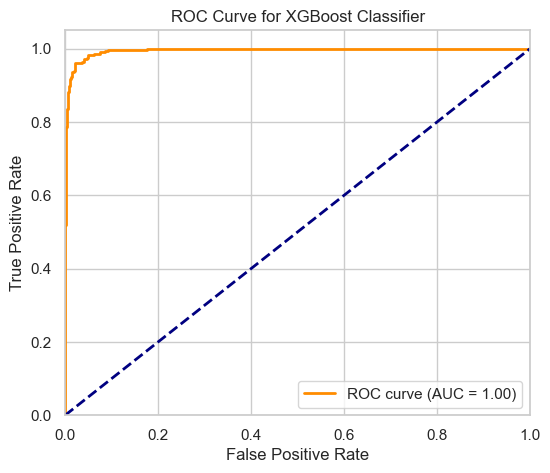

In [987]:
# Fitting the XGBClassifier on training data
xgboost = xgb.XGBClassifier()
xgboost.fit(scaled_X_train, y_train)

# Predicting probabilities for the positive class
y_pred_prob = xgboost.predict_proba(scaled_X_test)[:, 1]

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculating the AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Plotting the ROC curve
sns.set(style='whitegrid')
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()